<a href="https://colab.research.google.com/github/nsmith167/ml-learning/blob/main/news_topics_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Reuters data set

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Encode the words

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0 # Uses numpy's ability to access multiple elements at once by taking list of ints as argument
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Manually one-hot encode the labels too

In [ ]:
def to_one_hot(labels, dimension=46):
  '''
  In Keras, this can also be done using to_categorical()
  '''
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
      results[i, label] = 1.0
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Build our network

In [ ]:
from keras import models, layers, Input

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Validation data

In [ ]:
x_validation = x_train[:1000]
partial_x_train = x_train[1000:]

y_validation = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3325 - loss: 3.2888 - val_accuracy: 0.6080 - val_loss: 1.9562
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6690 - loss: 1.7053 - val_accuracy: 0.7010 - val_loss: 1.3890
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7356 - loss: 1.2427 - val_accuracy: 0.7400 - val_loss: 1.1925
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7868 - loss: 0.9851 - val_accuracy: 0.7570 - val_loss: 1.0818
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8204 - loss: 0.8261 - val_accuracy: 0.7890 - val_loss: 0.9896
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8573 - loss: 0.6834 - val_accuracy: 0.8010 - val_loss: 0.9500
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8744 - loss: 0.5792 - val_accuracy: 0.7930 - val_loss: 0.9241
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8966 - loss: 0.4751 - val_accuracy: 0.8200 - v

Plot our results

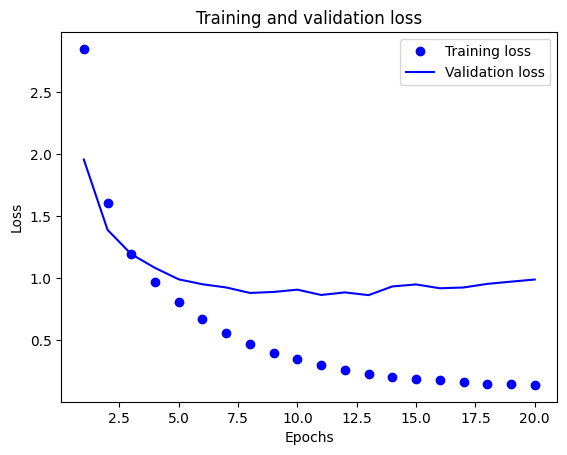

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

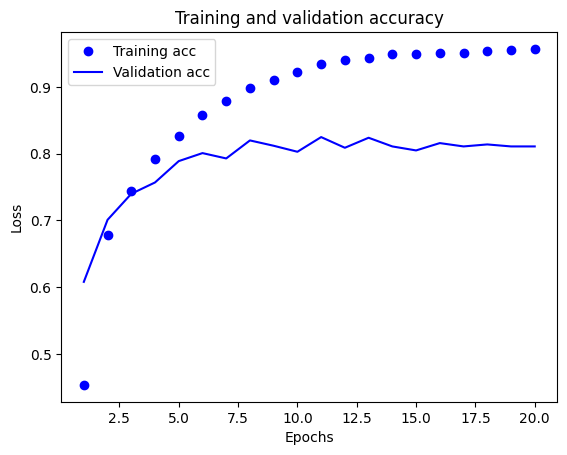

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train from scratch before overfitting occurs

In [ ]:
model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_validation, y_validation))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.4313 - loss: 3.1325 - val_accuracy: 0.6440 - val_loss: 1.7598
Epoch 2/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6821 - loss: 1.5600 - val_accuracy: 0.7020 - val_loss: 1.3325
Epoch 3/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7457 - loss: 1.1736 - val_accuracy: 0.7320 - val_loss: 1.1891
Epoch 4/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7926 - loss: 0.9400 - val_accuracy: 0.7720 - val_loss: 1.0592
Epoch 5/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8206 - loss: 0.7827 - val_accuracy: 0.7920 - val_loss: 0.9849
Epoch 6/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8649 - loss: 0.6257 - val_accuracy: 0.8120 - val_loss: 0.9333
Epoch 7/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8941 - loss: 0.5017 - val_accuracy: 0.7980 - val_loss: 0.9122
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7847 - loss: 0.9540


[0.9752513766288757, 0.7738201022148132]